In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("data(V,LSF)kmeans.csv")
df.head()

,Node,Volts,LSF
0,1,1.0000,0.0000
1,2,0.9970,0.0003
2,3,0.9829,0.0019
3,4,0.9754,0.0014
4,5,0.9680,0.0015


Text(0, 0.5, 'LSF')

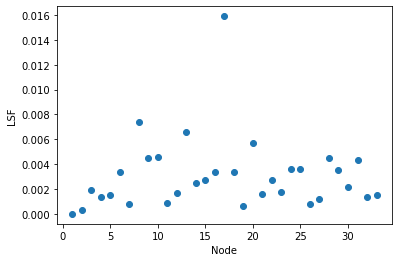

In [3]:
plt.scatter(df.Node,df.iloc[:,2].values)
plt.xlabel('Node')
plt.ylabel('LSF')

Text(0, 0.5, 'voltage')

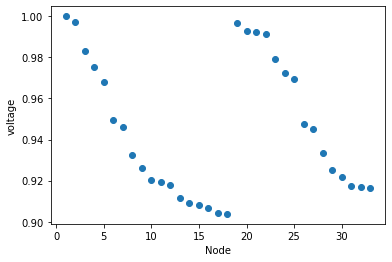

In [4]:
plt.scatter(df.Node,df.iloc[:,1].values)
plt.xlabel('Node')
plt.ylabel('voltage')

In [6]:
data = df.iloc[:,1:3].values    #voltage #LSF
print(type(data))

<class 'numpy.ndarray'>


In [17]:
km = KMeans(n_clusters=3)         
y_predicted = km.fit_predict(data)
y_predicted

array([0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1])

In [18]:
df['cluster']=y_predicted
print(df)

    Node   Volts     LSF  cluster
0      1  1.0000  0.0000        0
1      2  0.9970  0.0003        0
2      3  0.9829  0.0019        0
3      4  0.9754  0.0014        0
4      5  0.9680  0.0015        0
5      6  0.9495  0.0034        2
6      7  0.9460  0.0008        2
7      8  0.9323  0.0074        2
8      9  0.9260  0.0045        1
9     10  0.9201  0.0046        1
10    11  0.9193  0.0009        1
11    12  0.9177  0.0017        1
12    13  0.9116  0.0066        1
13    14  0.9093  0.0025        1
14    15  0.9079  0.0027        1
15    16  0.9065  0.0034        1
16    17  0.9044  0.0159        1
17    18  0.9038  0.0034        1
18    19  0.9965  0.0006        0
19    20  0.9929  0.0057        0
20    21  0.9922  0.0016        0
21    22  0.9916  0.0027        0
22    23  0.9793  0.0018        0
23    24  0.9726  0.0036        0
24    25  0.9693  0.0036        0
25    26  0.9476  0.0008        2
26    27  0.9450  0.0012        2
27    28  0.9336  0.0045        2
28    29  0.92

In [19]:
e=km.cluster_centers_
e
cdf=pd.DataFrame(e,columns=['valtage','LSF'])
cdf


,valtage,LSF
0,0.984808,0.002058
1,0.914967,0.003940
2,0.942333,0.003017


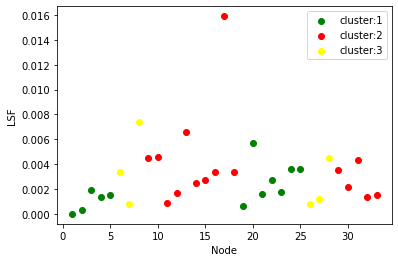

In [20]:

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Node,df1['LSF'],color='green',label='cluster:1')
plt.scatter(df2.Node,df2['LSF'],color='red',label='cluster:2')
plt.scatter(df3.Node,df3['LSF'],color='yellow',label='cluster:3')

plt.xlabel('load')
plt.ylabel('LSF')
plt.legend()
plt.show()

In [21]:

sse = []
k_range = range(1,34)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(data)
    sse.append(km.inertia_)

In [22]:
sse

[0.03535447393939395,
 0.005958882142857139,
 0.00274550933333333,
 0.001490200999999996,
 0.000858681136363636,
 0.0005439353571428569,
 0.0004105613571428568,
 0.00028051969047619056,
 0.0002196780238095237,
 0.0001629834999999997,
 0.00013475500000000005,
 0.00011606333333333401,
 9.009166666666694e-05,
 7.727083333333387e-05,
 6.481833333333334e-05,
 5.483166666666693e-05,
 4.5763333333333594e-05,
 3.970166666666653e-05,
 3.2911666666666794e-05,
 2.6039999999999798e-05,
 2.0711666666666836e-05,
 1.6741666666666967e-05,
 1.3375000000000176e-05,
 1.020500000000003e-05,
 7.154999999999927e-06,
 4.188333333333132e-06,
 3.1883333333331933e-06,
 2.264999999999884e-06,
 1.4799999999999236e-06,
 7.999999999999634e-07,
 2.1999999999996253e-07,
 9.999999999998018e-08,
 0.0]

### The SSE is defined as the sum of the squared Euclidean distances of each point to its closest centroid. Since this is a measure of error, the objective of k-means is to try to minimize this value. The purpose of this figure is to show that the initialization of the centroids is an important step :

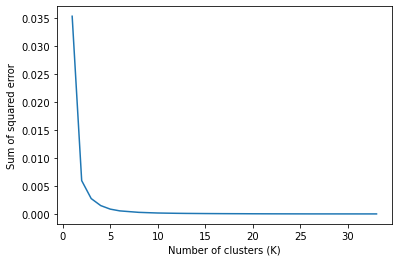

In [315]:

plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sse)